## «*Quien no se mueve, no siente las cadenas*».
### [Rosa de Luxemburgo](https://es.wikipedia.org/wiki/Rosa_Luxemburgo)

# ppi_SI_08_GeoPandas_SciPy

Actividad individual.

Utilice el dataset seleccionado en **SI02 Repositorio datos geoespaciales de Kaggle**.

Diligencie las casillas indicadas siguiendo las normas de estilo del PEP8.

# NOTA
*   En los ejercicios 02 hasta el 08 se utilizó el dataset universidades_reducidas el cual solo tiene 1000 filas de las 6559 para poder agilizar el procesamiento de los cálculos realizados en estos puntos ya que el tiempo de carga se volvía muy alto.
*   En los dos primeros ejercicios se usó el dataset completo, es probable que se demore un poco en cargar por la cantidad de datos que posee.

# Instalar GeoPandas

GeoPandas no es una librería nativa de Python por lo que **requiere ser instalada antes de ser invocada**.


In [ ]:
# Instalar GeoPandas
!pip install geopandas
# Instalar pep8
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8
# Instalar geodatasets
!pip install geodatasets

Looking in indexes: https://test.pypi.org/simple/


# Preparación del ejercicio

*   Importe las librerías requeridas
*   Lea el dataset a utilizar desde una url

Sugerencia: suba el dataset a Googledrive y luego publíquelo como página web. El siguiente enlace le indica cómo hacerlo: [Cómo publicar archivos de Documentos, Hojas de cálculo, Presentaciones y Formularios de Google](https://support.google.com/docs/answer/183965?hl=es-419&co=GENIE.Platform%3DDesktop).

Nota: si lo desea puede utilizar otro método para obtener la url del dataset.



In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as plt
import scipy
import geopandas as gpd
import geodatasets as gds

# Código para instalar npep8 en Google Colab.
from nbpep8.nbpep8 import pep8

# Conocer la versiones de las librerías instaladas
print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numPy: {np.__version__}')
print(f'Versión de matplotlib: {plt.__version__}')
print(f'Versión de geopandas: {plt.__version__}')
print(f'Versión de geodatasets: {gds.__version__}')
print("Versión de SciPy:", scipy.__version__)

# Guardar en la variable 'ruta' la url del dataset
ruta = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS215Yhtmp6rDZttG-CLyCe2sIwo0e_3f71Q-EiODCgBjcgCgFoWCbiXVCaOwlTdkvlyYs47c9Z0Pcv/pub?output=csv"

# Cargar el dataset a partir de la ruta establecida
universidades_csv = pd.read_csv(ruta)

# Divide la columna "coordenadas" en dos columnas de latitud y longitud
universidades_csv[['latitud', 'longitud']] = (
    universidades_csv['Geo Point']
    .str.split(', ', expand=True)
)

# Convierte las columnas de latitud y longitud a números flotantes
universidades_csv['latitud'] = universidades_csv['latitud'].astype(float)
universidades_csv['longitud'] = universidades_csv['longitud'].astype(float)

# Crea un GeoDataFrame con las columnas de latitud y longitud como geometría
universidades_geojson = gpd.GeoDataFrame(
    universidades_csv,
    geometry=gpd.points_from_xy(
        universidades_csv['longitud'],
        universidades_csv['latitud']
    )
)

# Verifica el GeoDataFrame
print(universidades_geojson)

# Comprobar que esté en formato pep8
pep8(_ih)

Versión de pandas: 1.5.3
Versión de numPy: 1.23.5
Versión de matplotlib: 3.7.1
Versión de geopandas: 3.7.1
Versión de geodatasets: 2023.3.0
Versión de SciPy: 1.11.3
                                   Geo Point  \
0     28.576141693000068, -81.36768715399995   
1     26.542857268000034, -80.09219037499997   
2     30.013145875000077, -95.44840231499995   
3      40.13962069400003, -74.96301849199995   
4     39.880220552000026, -75.00528053499994   
...                                      ...   
6554                   41.337206, -74.161936   
6555  45.74220384300003, -108.61691105199998   
6556   41.08139248700007, -74.04580035599997   
6557   41.12182865300008, -74.06510640399995   
6558   33.43530149800006, -94.07935092499997   

                                              Geo Shape  OBJECTID  IPEDSID  \
0     {"coordinates": [-81.36768715399995, 28.576141...        11   133872   
1     {"coordinates": [-80.09219037499997, 26.542857...        59   487445   
2     {"coordinates": [-

## '00.  Mostrar datos

Ubique en un mapa las coordenadas de los puntos contenidos en el dataset.

<ipython-input-97-dc8eb2d32ea2>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  ruta_mapa = gpd.datasets.get_path("naturalearth_lowres")


Mapa de la localización de las universidades de US:


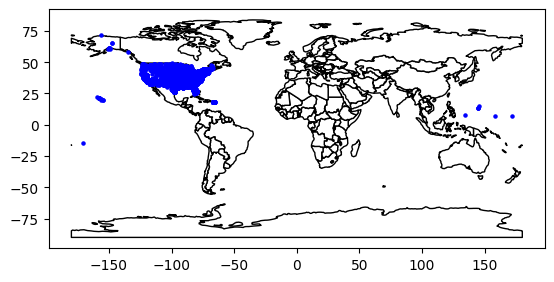

In [ ]:
# Indicar la ruta del dataset nativo que contiene el mapa
ruta_mapa = gpd.datasets.get_path("naturalearth_lowres")

# Leer el dataset nativo
mundo_dataframe = gpd.read_file(ruta_mapa)

# Establecer el mapa de referencia
base = mundo_dataframe.plot(color='white', edgecolor='black')

# Superponer las ciudades al mapa de referencia
universidades_geojson.plot(ax=base, marker='o', color='blue',
                           markersize=5)

# Mostrar el mapa superpuesto
print("Mapa de la localización de las universidades de US:")
plt.show()

## '01. Seleccionar datos

Ubique en un mapa los cinco puntos más alejados del centro del dataset.

In [ ]:
# Importaciones de librerías estándar de Python
import folium

# Importaciones de librerías de terceros
from scipy.spatial import distance

# Calcular el centro del dataset
centro_latitud = universidades_geojson['latitud'].mean()
centro_longitud = universidades_geojson['longitud'].mean()

# Calcular las distancias euclidianas desde el centro
distancias = universidades_geojson.apply(
    lambda row: distance.euclidean(
        (row['latitud'], row['longitud']),
        (centro_latitud, centro_longitud)
    ),
    axis=1
)

# Obtener los índices de los 5 puntos más alejados
indices_mas_alejados = distancias.nlargest(5).index

# Obtener los puntos más alejados del centro
puntos_mas_alejados = universidades_geojson.loc[indices_mas_alejados]

# Crear un mapa centrado en el centro del dataset
mapa = folium.Map(location=[centro_latitud, centro_longitud],
                  zoom_start=1)

# Añadir marcadores al mapa para los 5 puntos más alejados
for index, row in puntos_mas_alejados.iterrows():
    folium.Marker([row['latitud'], row['longitud']],
                  popup=row['NAME']).add_to(mapa)


# Comprobar que esté en formato pep8
pep8(_ih)

# Mostrar el mapa
mapa

## '02. Distancia euclidiana

Calcule la distancia euclideana para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es mínima.

In [ ]:
# Importar módulos requeridos
from scipy.spatial.distance import euclidean
from itertools import combinations

# Reducir el DataFrame a 1000 datos
universidades_reducidas = universidades_geojson.sample(n=1000,
                                                       random_state=42)

# Crear una lista de coordenadas como tuplas (latitud, longitud)
coordenadas = list(zip(universidades_reducidas['latitud'],
                       universidades_reducidas['longitud']))

# Calcular las distancias euclidianas entre todas las combinaciones
# de puntos
distancias = [euclidean(coord1, coord2) for coord1,
              coord2 in combinations(coordenadas, 2)]

# Calcular el promedio, la distancia mínima y la distancia máxima
promedio_distancias = sum(distancias) / len(distancias)
distancia_minima = min(distancias)
distancia_maxima = max(distancias)

# Encontrar el par de coordenadas con la distancia mínima y máxima
par_minimo = combinations(coordenadas, 2).__next__()
par_maximo = combinations(coordenadas, 2).__next__()
for coord1, coord2 in combinations(coordenadas, 2):
    if euclidean(coord1, coord2) == distancia_minima:
        par_minimo = (coord1, coord2)
    if euclidean(coord1, coord2) == distancia_maxima:
        par_maximo = (coord1, coord2)

# Mostrar los resultados
print("Promedio de las distancias:", promedio_distancias)
print("Distancia mínima entre dos puntos:", distancia_minima)
print("Par de coordenadas con distancia mínima:", par_minimo)
print("Distancia máxima entre dos puntos:", distancia_maxima)
print("Par de coordenadas con distancia máxima:", par_maximo)

# Comprobar que esté en formato pep8
pep8(_ih)

Promedio de las distancias: 19.773525414531388
Distancia mínima entre dos puntos: 7.644202924902586e-05
Par de coordenadas con distancia mínima: ((32.827544214000056, -115.50397685999997), (32.827563300000065, -115.50390283899998))
Distancia máxima entre dos puntos: 92.92167958971247
Par de coordenadas con distancia máxima: ((18.344193, -64.972866), (21.29511205500006, -157.84767751799998))



## '03. Distancia de Manhattan

Calcule la distancia de Manhattan para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es mínima.

In [ ]:
# Importar módulos requeridos
from scipy.spatial.distance import cityblock

# Crear una lista de coordenadas como tuplas (latitud, longitud)
coordenadas = list(zip(universidades_reducidas['latitud'],
                       universidades_reducidas['longitud']))

# Calcular las distancias de Manhattan entre todas las combinaciones
# de puntos
distancias = [cityblock(coord1, coord2) for coord1,
              coord2 in combinations(coordenadas, 2)]

# Calcular el promedio, la distancia mínima y la distancia máxima
promedio_distancias = sum(distancias) / len(distancias)
distancia_minima = min(distancias)
distancia_maxima = max(distancias)

# Encontrar el par de coordenadas con la distancia mínima y máxima
par_minimo = combinations(coordenadas, 2).__next__()
par_maximo = combinations(coordenadas, 2).__next__()
for coord1, coord2 in combinations(coordenadas, 2):
    if cityblock(coord1, coord2) == distancia_minima:
        par_minimo = (coord1, coord2)
    if cityblock(coord1, coord2) == distancia_maxima:
        par_maximo = (coord1, coord2)

# Mostrar los resultados
print("Promedio de las distancias de Manhattan:", promedio_distancias)
print("Distancia mínima de Manhattan entre dos puntos:", distancia_minima)
print("Par de coordenadas con distancia mínima de Manhattan:", par_minimo)
print("Distancia máxima de Manhattan entre dos puntos:", distancia_maxima)
print("Par de coordenadas con distancia máxima de Manhattan:", par_maximo)

# Comprobar que esté en formato pep8
pep8(_ih)

Promedio de las distancias de Manhattan: 23.8020689604269
Distancia mínima de Manhattan entre dos puntos: 9.310699999787175e-05
Par de coordenadas con distancia mínima de Manhattan: ((32.827544214000056, -115.50397685999997), (32.827563300000065, -115.50390283899998))
Distancia máxima de Manhattan entre dos puntos: 112.72630122000001
Par de coordenadas con distancia máxima de Manhattan: ((44.39524793000004, -68.22151217299995), (21.29511205500006, -157.84767751799998))



## '04. Distancia de coseno

Calcule la distancia de coseno para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es mínima.

In [ ]:
# Importar módulos requeridos
from scipy.spatial.distance import cosine

# Convertir latitud y longitud en vectores normalizados
vectores = np.array(list(zip(universidades_reducidas['latitud'],
                             universidades_reducidas['longitud'])))
vectores_normalizados = vectores / np.linalg.norm(vectores,
                                                  axis=1)[:, np.newaxis]

# Calcular las distancias coseno entre todas las combinaciones de puntos
distancias = [cosine(coord1, coord2) for coord1,
              coord2 in combinations(vectores_normalizados, 2)]

# Calcular el promedio, la distancia mínima y la distancia máxima
promedio_distancias = sum(distancias) / len(distancias)
distancia_minima = min(distancias)
distancia_maxima = max(distancias)

# Encontrar el par de coordenadas con la distancia mínima y máxima
par_minimo = combinations(vectores_normalizados, 2).__next__()
par_maximo = combinations(vectores_normalizados, 2).__next__()
for coord1, coord2 in combinations(vectores_normalizados, 2):
    if cosine(coord1, coord2) == distancia_minima:
        par_minimo = (coord1, coord2)
    if cosine(coord1, coord2) == distancia_maxima:
        par_maximo = (coord1, coord2)

# Mostrar los resultados
print("Promedio de las distancias coseno:", promedio_distancias)
print("Distancia mínima coseno entre dos puntos:", distancia_minima)
print("Par de coordenadas con distancia mínima coseno:", par_minimo)
print("Distancia máxima coseno entre dos puntos:", distancia_maxima)
print("Par de coordenadas con distancia máxima coseno:", par_maximo)

# Comprobar que esté en formato pep8
pep8(_ih)

Promedio de las distancias coseno: 0.006458084833014498
Distancia mínima coseno entre dos puntos: 4.440892098500626e-16
Par de coordenadas con distancia mínima coseno: (array([ 0.39594135, -0.9182758 ]), array([ 0.39594132, -0.91827581]))
Distancia máxima coseno entre dos puntos: 0.09644609601627585
Par de coordenadas con distancia máxima coseno: (array([ 0.54543104, -0.8381557 ]), array([ 0.13369805, -0.99102211]))



## '05. Triangulación de Delaunay

Aplique la [Triangulación de Delaunay](https://en.wikipedia.org/wiki/Delaunay_triangulation) para los puntos que se encuentran en el dataset.

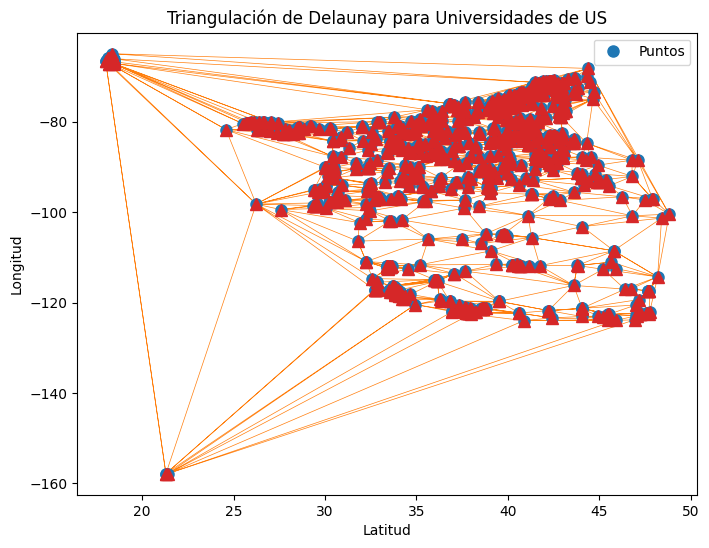

In [ ]:
# Importar módulo de matplotlib y módulo de scipy
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Crear una lista de coordenadas como tuplas (latitud, longitud)
coordenadas = list(zip(universidades_reducidas['latitud'],
                       universidades_reducidas['longitud']))

# Realizar la triangulación de Delaunay
triangulacion = Delaunay(coordenadas)

# Visualizar los puntos y los triángulos
plt.figure(figsize=(8, 6))
plt.plot(universidades_reducidas['latitud'],
         universidades_reducidas['longitud'],
         'o', markersize=8, label='Puntos')
plt.triplot(universidades_reducidas['latitud'],
            universidades_reducidas['longitud'],
            triangulacion.simplices, linewidth=0.5)
plt.plot(universidades_reducidas['latitud'],
         universidades_reducidas['longitud'], '^', markersize=8)
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Triangulación de Delaunay para Universidades de US')
plt.legend()
plt.show()

# Comprobar que esté en formato pep8
pep8(_ih)

## '06. Casco convexo

Calcule y muestre el casco convexo para los puntos que se encuentran en el dataset.

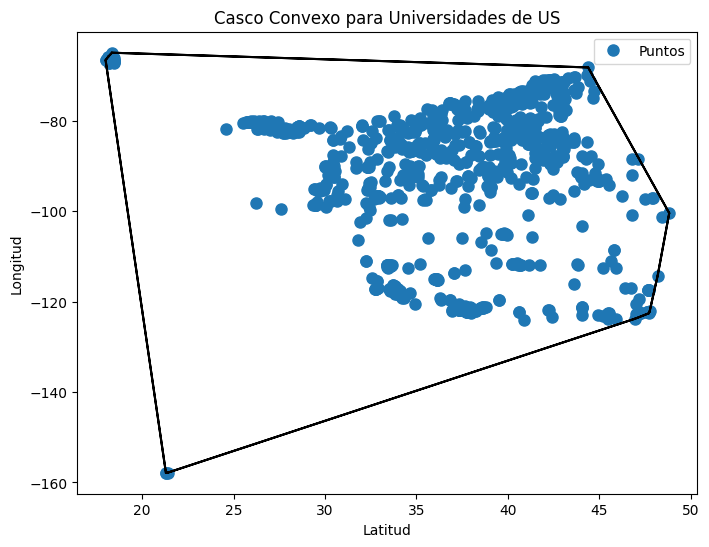

In [ ]:
# Importar módulos requeridos
from scipy.spatial import ConvexHull

# Crear una lista de coordenadas como tuplas (latitud, longitud)
coordenadas = list(zip(universidades_reducidas['latitud'],
                       universidades_reducidas['longitud']))

# Calcular el casco convexo
casco_convexo = ConvexHull(coordenadas)

# Visualizar los puntos y el casco convexo
plt.figure(figsize=(8, 6))
plt.plot(universidades_reducidas['latitud'],
         universidades_reducidas['longitud'],
         'o', markersize=8, label='Puntos')
for simplex in casco_convexo.simplices:
    plt.plot([coordenadas[i][0] for i in simplex] +
             [coordenadas[simplex[0]][0]],
             [coordenadas[i][1] for i in simplex] +
             [coordenadas[simplex[0]][1]], 'k-')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Casco Convexo para Universidades de US')
plt.legend()
plt.show()

# Comprobar que esté en formato pep8
pep8(_ih)

## '07. Sumatoria de mínimos cuadrados

Calcule la sumatoria de mínimos cuadrados para los puntos que se encuentran en el dataset.

In [ ]:
# Importar módulos requeridos
from scipy.stats import linregress

# Calcular la regresión lineal y obtener la suma de los cuadrados de
# los residuos
regresion = linregress(universidades_reducidas['latitud'],
                       universidades_reducidas['longitud'])
sumatoria_minimos_cuadrados = regresion.rvalue ** 2

# Mostrar el resultado de la sumatoria
print("Sumatoria de mínimos cuadrados:", sumatoria_minimos_cuadrados)

# Comprobar que esté en formato pep8
pep8(_ih)

Sumatoria de mínimos cuadrados: 0.0017437477458057218



## '08. Cluster

Calcule el agrupamiento (cluster) de nivel tres para los puntos que se encuentran en el dataset.

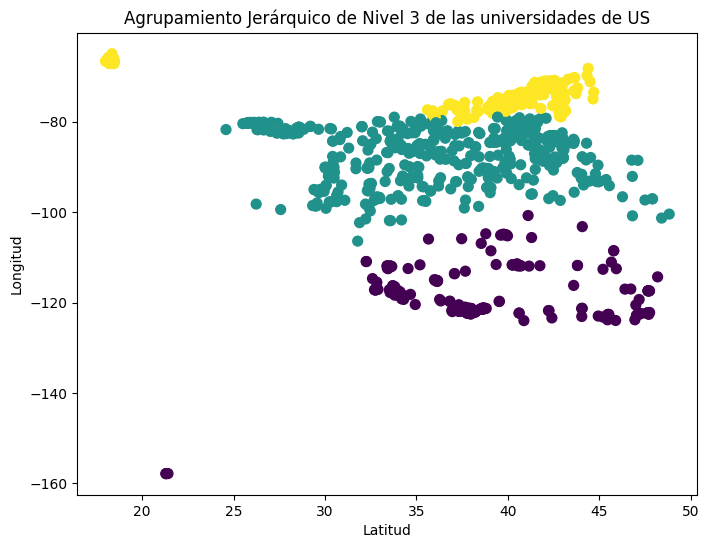

Clústeres asignados:
[2 3 2 2 3 2 2 2 2 1 1 3 2 3 2 2 3 3 1 3 3 1 2 2 1 3 2 3 3 2 2 1 1 3 1 2 1
 1 2 2 3 2 1 2 2 2 1 2 2 2 3 2 2 2 2 2 2 3 1 2 3 1 2 1 1 2 2 2 2 2 1 3 3 1
 2 2 3 1 1 1 1 3 2 2 2 2 2 1 3 1 2 1 3 1 1 1 2 2 2 1 1 3 2 2 1 2 2 3 3 3 2
 3 2 3 2 2 2 1 3 2 2 2 3 3 1 2 1 3 3 1 2 3 2 1 2 1 3 1 3 2 2 2 2 2 1 2 2 1
 3 2 1 3 2 1 3 3 2 1 2 2 3 2 1 3 2 2 1 2 1 2 3 2 2 2 3 2 3 2 3 2 2 3 1 3 2
 1 2 1 2 2 2 1 2 2 2 2 3 2 2 2 1 1 2 2 2 2 2 2 1 2 1 2 3 2 2 2 3 1 3 2 1 2
 3 1 3 3 1 2 2 3 2 2 2 3 2 2 3 3 2 3 2 2 2 1 3 2 3 2 2 1 2 3 2 2 2 2 1 1 1
 3 2 2 2 2 2 2 2 1 2 1 1 2 2 1 1 2 2 2 2 1 2 2 2 2 1 3 1 2 2 2 1 2 2 3 1 2
 3 3 1 1 2 3 3 2 3 2 2 1 2 2 3 2 3 3 2 2 2 2 2 2 3 1 2 1 2 2 2 2 1 2 3 3 3
 2 1 3 1 2 1 3 2 3 1 3 1 2 3 2 2 1 3 2 2 2 3 3 2 3 3 2 3 1 2 3 2 2 1 1 3 2
 2 2 2 2 3 3 2 2 2 1 2 2 2 2 2 1 2 3 1 3 2 3 2 3 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 3 1 1 3 3 3 2 1 2 2 1 3 2 2 2 2 3 2 3 2 3 3 1 3 2 3 3 2 1 3 2 3 1 2 2 3
 2 2 1 1 2 3 2 1 2 1 3 2 3 2 2 2 1 2 2 1 3 3 3 2 1 2 3 2 1 1 2 2 3 2 2 2 2
 3 2

In [ ]:
# Importar módulos requeridos
from scipy.cluster.hierarchy import linkage, fcluster

# Crear una matriz de coordenadas como (latitud, longitud)
coordenadas = np.array(universidades_reducidas[['latitud', 'longitud']])

# Calcular los enlaces para el agrupamiento jerárquico
enlaces = linkage(coordenadas, method='ward')

# Realizar la asignación de clúster para el nivel tres
clusters = fcluster(enlaces, 3, criterion='maxclust')

# Visualizar los clústeres
plt.figure(figsize=(8, 6))
plt.scatter(universidades_reducidas['latitud'],
            universidades_reducidas['longitud'], c=clusters,
            cmap='viridis', s=50)
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Agrupamiento Jerárquico de Nivel 3 de las universidades de US')
plt.show()

# Mostrar los resultados de los clústeres
print("Clústeres asignados:")
print(clusters)

# Comprobar que esté en formato pep8
pep8(_ih)